In [5]:
!wget https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier/blob/master/resources/dogcat_model_bak.h5

--2022-09-05 17:49:01--  https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier/blob/master/resources/dogcat_model_bak.h5
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dogcat_model_bak.h5’

dogcat_model_bak.h5     [     <=>            ] 128.90K   105KB/s    in 1.2s    

2022-09-05 17:49:03 (105 KB/s) - ‘dogcat_model_bak.h5’ saved [131998]



In [24]:
# https://www.codegrepper.com/code-examples/python/AttributeError%3A+module+%27tensorflow%27+has+no+attribute+%27get_default_graph%27
# import tensorflow as tf
# tf.compat.v1.reset_default_graph()

In [ ]:
# from keras.models import Sequential
# from keras.layers import Flatten
# from keras.layers import Dense
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.optimizers import Adam


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

# adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [3]:
classifier

In [24]:
# from tensorflow.keras.models import load_model
# # model = load_model('dogcat_model_bak.h5')
# classifier.load_weights('dogcat_model_bak.h5')

In [20]:
# import os.path

# if os.path.isfile('dogcat_model_bak.h5'):
#     print ("File exist")
# else:
#     print ("File not exist")

File exist


In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

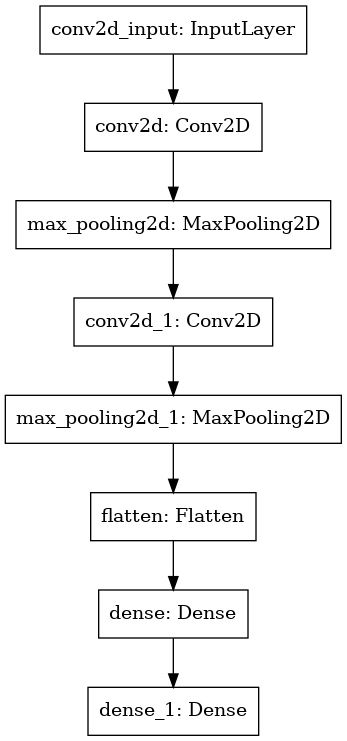

In [8]:
import tensorflow
tensorflow.keras.utils.plot_model(classifier, "CNN_cat_vs_dog.png")

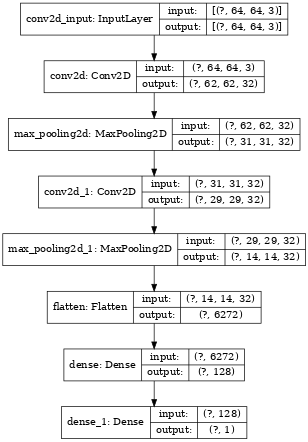

In [25]:
tensorflow.keras.utils.plot_model(classifier, 
                                  show_shapes=True, 
                                  show_layer_names=True, 
                                  expand_nested=True, 
                                  dpi=50, 
                                  to_file="CNN_cat_vs_dog_detailed.png"
                        )

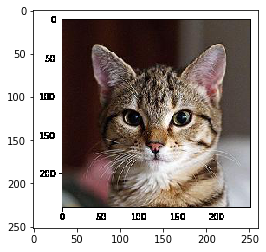

In [5]:
from keras_preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

# img_path = '/content/Cat03.jpg'
img_path = 'cat.jpg'
#Input Image for Layer visualization
img1 = image.load_img(img_path)
plt.imshow(img1)

#preprocess image
img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [6]:
classifier.predict(img)

array([[0.43013543]], dtype=float32)

In [9]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [11]:
from tensorflow.keras.models import Model

conv2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d').output)
max_pooling2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d').output)
conv2d_12_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_1').output)
max_pooling2d_12_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d_1').output)

In [12]:
conv2d_11_features = conv2d_11_output.predict(img)
conv2d_12_features = conv2d_12_output.predict(img)
print('1st conv layer feature output shape : ',conv2d_11_features.shape)
print('2nd conv layer feature output shape : ',conv2d_12_features.shape)

print("\n")

max_pool_11_featues = max_pooling2d_11_output.predict(img)
max_pool_12_featues = max_pooling2d_12_output.predict(img)
print('1st max pool layer feature output shape:', max_pool_11_featues.shape)
print('2nd max pool layer feature output shape:', max_pool_12_featues.shape)

1st conv layer feature output shape :  (1, 62, 62, 32)
2nd conv layer feature output shape :  (1, 29, 29, 32)


1st max pool layer feature output shape: (1, 31, 31, 32)
2nd max pool layer feature output shape: (1, 14, 14, 32)


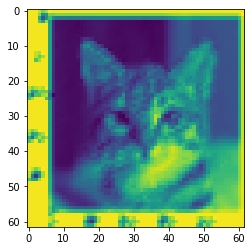

In [13]:
# show filter 4 image
plt.imshow(conv2d_11_features[0, :, :, 4])

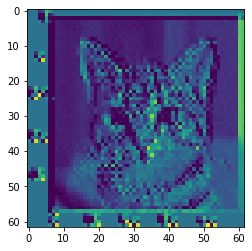

In [14]:
# show filter 10 image
plt.imshow(conv2d_11_features[0, :, :, 5])

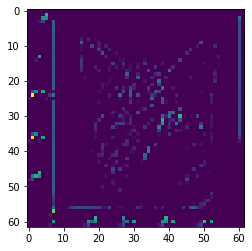

In [15]:
# show filter 4 image
plt.imshow(conv2d_11_features[0, :, :, 11])

# visualize effects of 1st conv layer filters

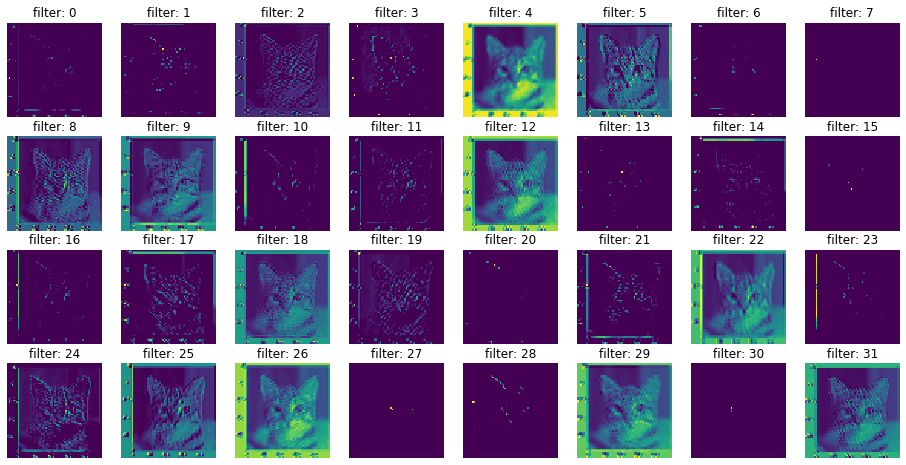

In [16]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
#total 32 filters
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_11_features[0, :, :, i])
plt.show()

# visualize effects of 2nd conv layer filters

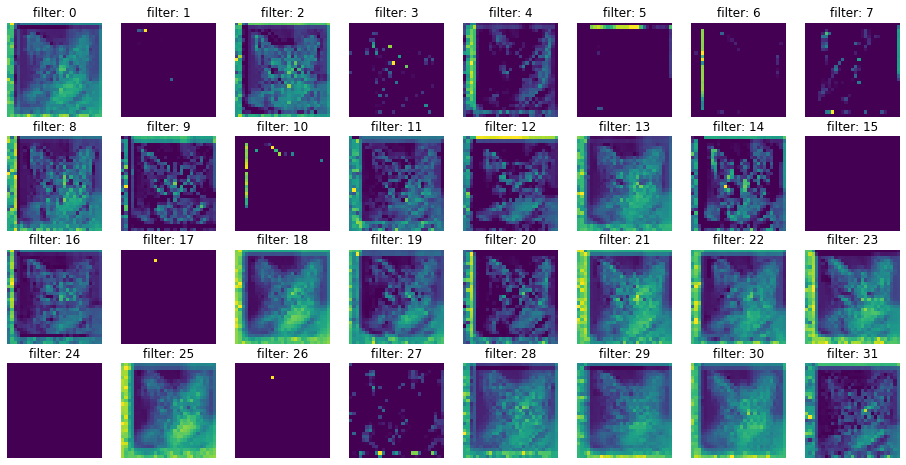

In [17]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
#total 32 filters
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_12_features[0, :, :, i])
plt.show()

# visualize effects of 1st max pooling layer filters

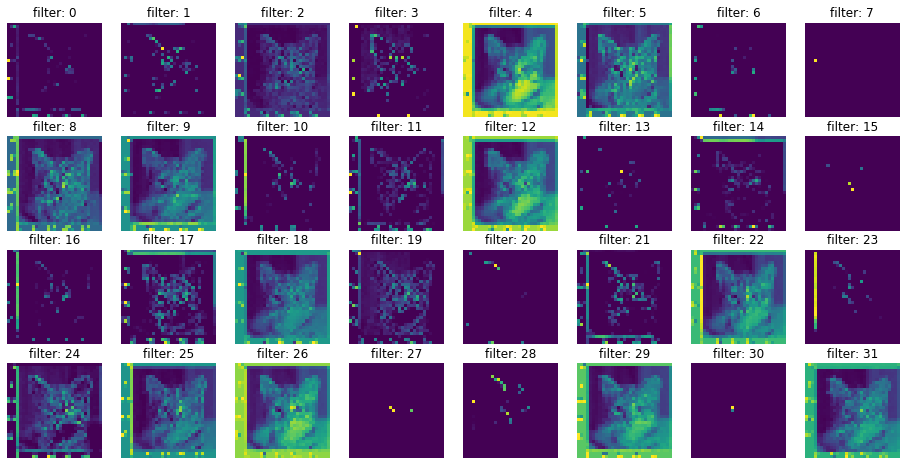

In [18]:
#1st max pool
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_11_featues[0, :, :, i])
plt.show()

# visualize effects of 2nd max pooling layer filters

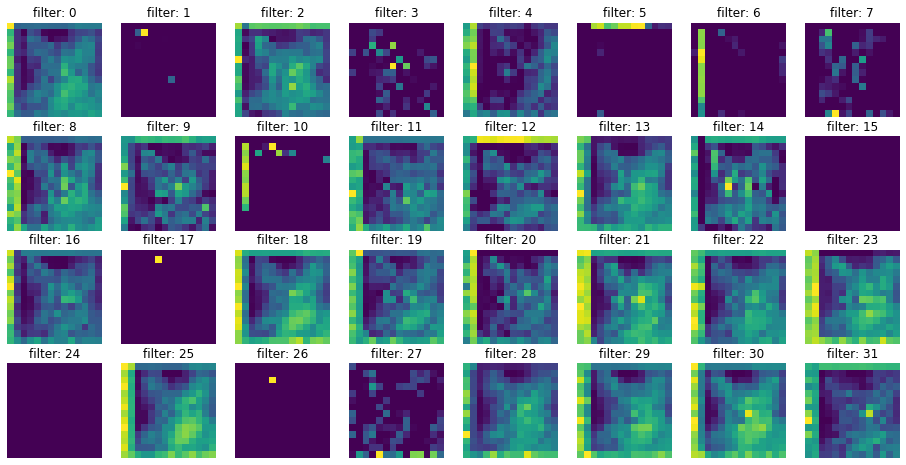

In [20]:
# 2nd max pool
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_12_featues[0, :, :, i])
plt.show()

In [22]:
dense_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('dense').output)
dense_11_featues = dense_11_output.predict(img)
print('dense_11_feature_shape : ', dense_11_featues.shape)

dense_11_feature_shape :  (1, 128)


In [23]:
print(dense_11_featues[0].flatten())

[0.         0.         0.         0.         0.         0.15141362
 0.17417888 0.         0.03764786 0.         0.35771358 0.06749959
 0.04211978 0.2758582  0.3412988  0.35095552 0.         0.
 0.         0.         0.0408307  0.         0.         0.
 0.0525839  0.         0.16463104 0.23424976 0.47496438 0.3183229
 0.         0.21452118 0.03769514 0.33355114 0.12103429 0.00936961
 0.         0.         0.         0.         0.         0.0048156
 0.2070563  0.         0.         0.         0.25286472 0.16684745
 0.11981093 0.47977027 0.         0.         0.08293241 0.
 0.45509684 0.39710212 0.         0.         0.         0.
 0.12541875 0.2400453  0.         0.         0.         0.13415055
 0.2890041  0.04352145 0.         0.         0.         0.6988237
 0.01900956 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07871813 0.6459416
 0.16821626 0.         0.31033987 0.03839174 0.         0.
 0.         0.         0.03241026 0.16655171 0.

# visualize effects of conv and max pooling layer filters 

In [36]:
from tensorflow.keras.models import Model
import math
def layerWiseVisualization(model, img):
    inputs = model.input
    layer_names = [layer.name for layer in model.layers]
    
    #layer_names = layer_names[1:]
    print(layer_names)
    for layer in layer_names[:-3]: #excluding flatten and dense layers
        print("Layer: ", layer)
        layer_output = Model(inputs=model.input, outputs=model.get_layer(layer).output)
        layer_features = layer_output.predict(img.reshape(1, 64, 64, 3))
        fig = plt.figure(figsize=(16,8))
        shape = layer_features.shape[-1]
        columns = 8
        rows = math.ceil(shape/columns)
        print('layer feature output shape : ',layer_features.shape)
        for i in range(shape):
            fig.add_subplot(rows, columns, i+1)
            plt.axis('off')
            plt.title('filter: ' + str(i))
            plt.imshow(layer_features[0, :, :, i])
            #error for flatten and dense layers
            #print(layer_features[0, :, :, i])
        plt.show()

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']
Layer:  conv2d
layer feature output shape :  (1, 62, 62, 32)


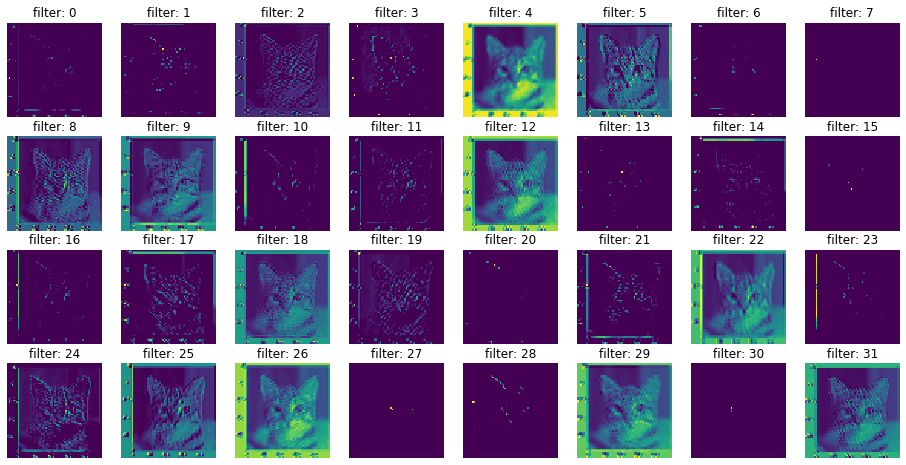

Layer:  max_pooling2d
layer feature output shape :  (1, 31, 31, 32)


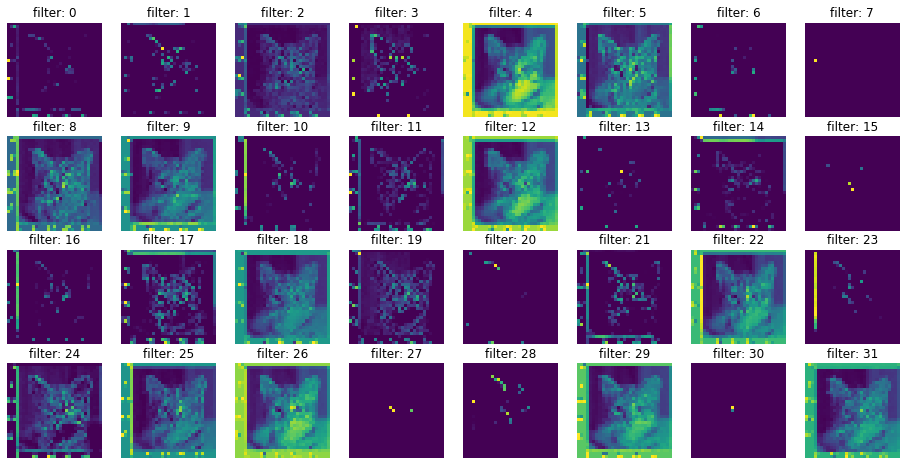

Layer:  conv2d_1
layer feature output shape :  (1, 29, 29, 32)


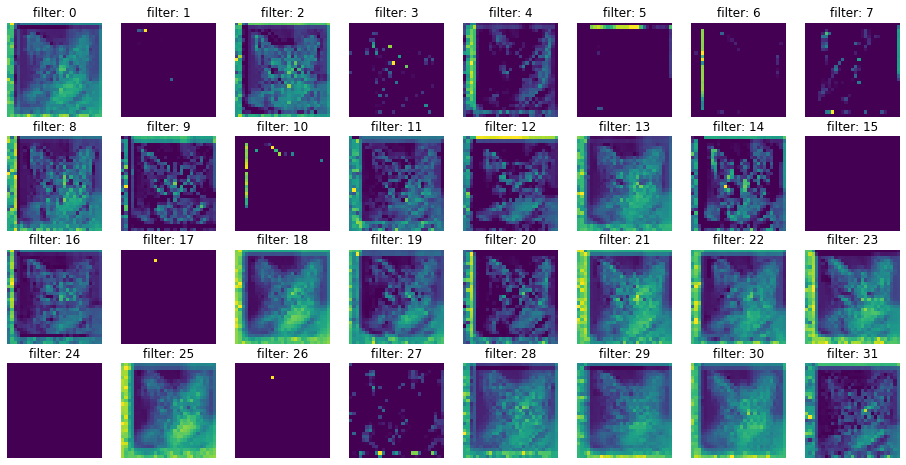

Layer:  max_pooling2d_1
layer feature output shape :  (1, 14, 14, 32)


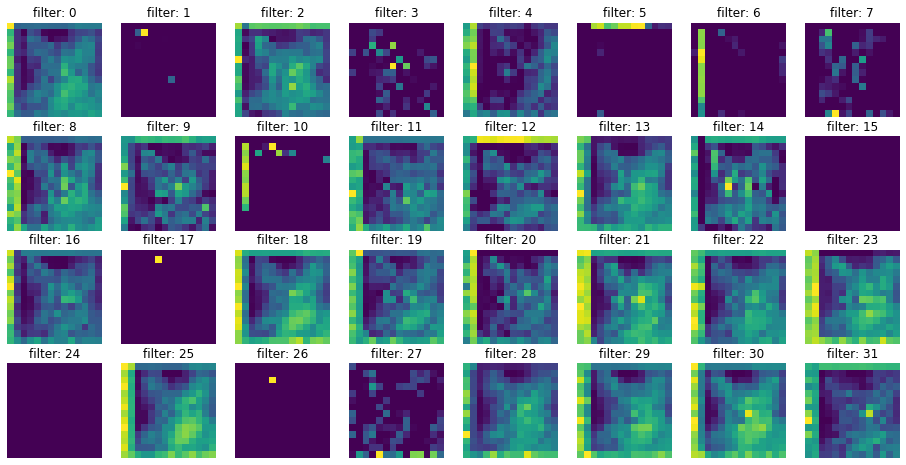

In [37]:
layerWiseVisualization(classifier, img)

# Resourse 
- https://www.analyticsvidhya.com/blog/2020/11/tutorial-how-to-visualize-feature-maps-directly-from-cnn-layers/

- https://github.com/christianversloot/machine-learning-articles/blob/main/visualize-layer-outputs-of-your-keras-classifier-with-keract.md

- https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn/notebook